In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
hnames = ['preg', 'plas',  'press', 'skin', 'ins', 'mass', 'fun', 'age', 'out']
df = pd.read_csv("indians_diabetes.csv", names=hnames)

x = df.iloc[:,[0,1,2,3,4,5,6,7]].values
y = df.iloc[:, [-1]].values

df.describe()

,preg,plas,press,skin,ins,mass,fun,age,out
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.3, random_state=8)

from sklearn.linear_model import LinearRegression, LogisticRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)


In [4]:
print(f'Error: {(y_test.sum()-y_predict.sum())/len(y_test)*100:.2f} %')

Error: 1.60 %


In [5]:
X = df.iloc[:,0:8].values
Y = df.iloc[:, 8].values

from sklearn.preprocessing import Binarizer
scaler = Binarizer(threshold=2.0)
rescaled_x = scaler.fit_transform(x)
print(rescaled_x)

[[1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]]


# Feature selection

F = $\{x_ox_1x_2x_4$\}

#More information doesn't always means better classification ->
#. Irrevelant data
#Reduce Overfitting improve accuracy reduce training time.

## Ways to select features

1. Univariate Selection
2. Recursive Feature Elimation
3. Principle Component Analysis
4. Feature Importance Selection



In [6]:
count = df.groupby("out").size()
count

out
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002357EB67250>,
      dtype=object)

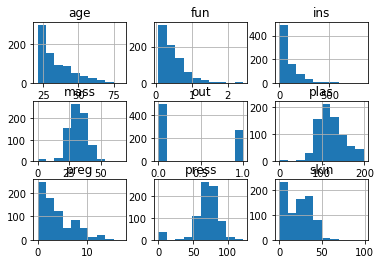

In [7]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002357FA43E20>,
      dtype=object)

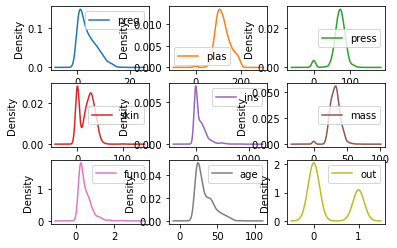

In [13]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

preg        AxesSubplot(0.125,0.657941;0.227941x0.222059)
plas     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
press    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skin        AxesSubplot(0.125,0.391471;0.227941x0.222059)
ins      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
mass     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
fun            AxesSubplot(0.125,0.125;0.227941x0.222059)
age         AxesSubplot(0.398529,0.125;0.227941x0.222059)
out         AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

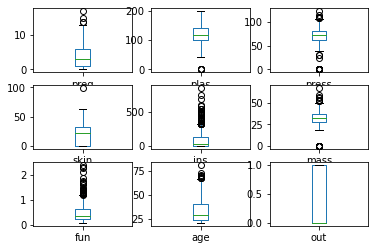

In [9]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002357F2D54F0>,
      dtype=object)

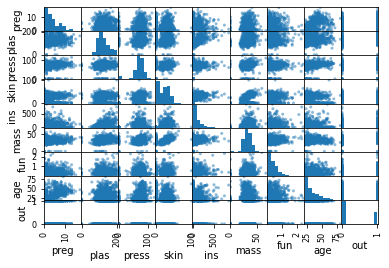

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [15]:
correlation = df.corr()
correlation

,preg,plas,press,skin,ins,mass,fun,age,out
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
press,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
fun,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
out,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


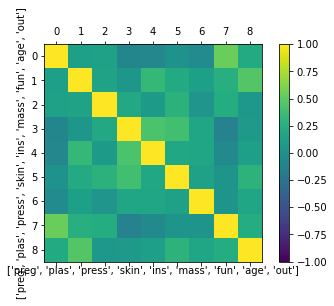

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

cx = ax.matshow(correlation, vmin=-1,vmax=1)

fig.colorbar(cx)
ticks = np.arange(9)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel(hnames)
ax.set_ylabel(hnames)

plt.show()

In [18]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

f"Accuracy: {accuracy_score(y_test, y_predict)}"

c:\users\abugh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Accuracy: 0.7532467532467533'